In [46]:
import numpy as np
from astropy.coordinates import SkyCoord, Angle
from astropy.table import Table
import astropy.units as u
import astropy.visualization as vis
from regions import CircleSkyRegion
from gammapy.data import ObservationFilter
from gammapy.makers import ReflectedRegionsFinder
import scanner_interpretation as scani
from scipy.stats import expon
import dill
import matplotlib.pyplot as plt

In [26]:
## Loading data
with open("pkl_jugs/plotter_pval0/multiplets.pkl","rb") as f:
    reduced: Table = dill.load(f)
dwarf = reduced[35]

hess1 = scani.getDataStores()[0]
obs = hess1.obs(dwarf["OBS_ID"])

## Setup
radius = Angle(0.1,"deg")
on_region = CircleSkyRegion(dwarf["SkyCoord"], radius)
pointing = SkyCoord(obs.obs_info["RA_PNT"],obs.obs_info["DEC_PNT"], frame="fk5", unit="deg")


In [21]:
finder = ReflectedRegionsFinder()
reflected_regions = finder.run(region = on_region, center = pointing)


In [43]:
bkg_rates = []
photon_count = []
for region in reflected_regions[0]:
    selection = obs.events.select_region(region)
    photon_count.append(len(selection.table))

    arrival_times = selection.table["TIME"]
    bkg_rates.append(1e-9/expon.fit(np.diff(np.sort(arrival_times)))[1])

In [44]:
reflected_regions_tab = Table([reflected_regions[0],bkg_rates,photon_count],names=["REGION","BKG_RATE","PHOTON_COUNT"])

In [50]:
reflected_regions_tab

REGION,BKG_RATE,PHOTON_COUNT
object,float64,int64
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (283.35190894, -30.47996356)>\nradius: 359.988804990008 arcsec",8.920756960440141e-12,15
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (283.56471728, -30.41256377)>\nradius: 359.98339396721633 arcsec",9.364724565627709e-12,12
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (283.79004571, -30.39178788)>\nradius: 359.98162795326357 arcsec",6.615787809993032e-12,11
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (284.01447887, -30.41887278)>\nradius: 359.98392113034595 arcsec",9.420995499801915e-12,9
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (284.22465096, -30.49220583)>\nradius: 359.98973555195283 arcsec",7.830828203162005e-12,12
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (284.40798778, -30.60741438)>\nradius: 359.99770452772964 arcsec",1.3881833297498801e-11,14
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (284.55341759, -30.75761002)>\nradius: 360.0059465435345 arcsec",2.4361660154395354e-11,9
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (284.65201995, -30.93377736)>\nradius: 360.01250278257044 arcsec",6.70299265689377e-12,9
"Region: CircleSkyRegion\ncenter: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg\n (284.6975798, -31.12529047)>\nradius: 360.01579912054126 arcsec",9.75638317238509e-12,7


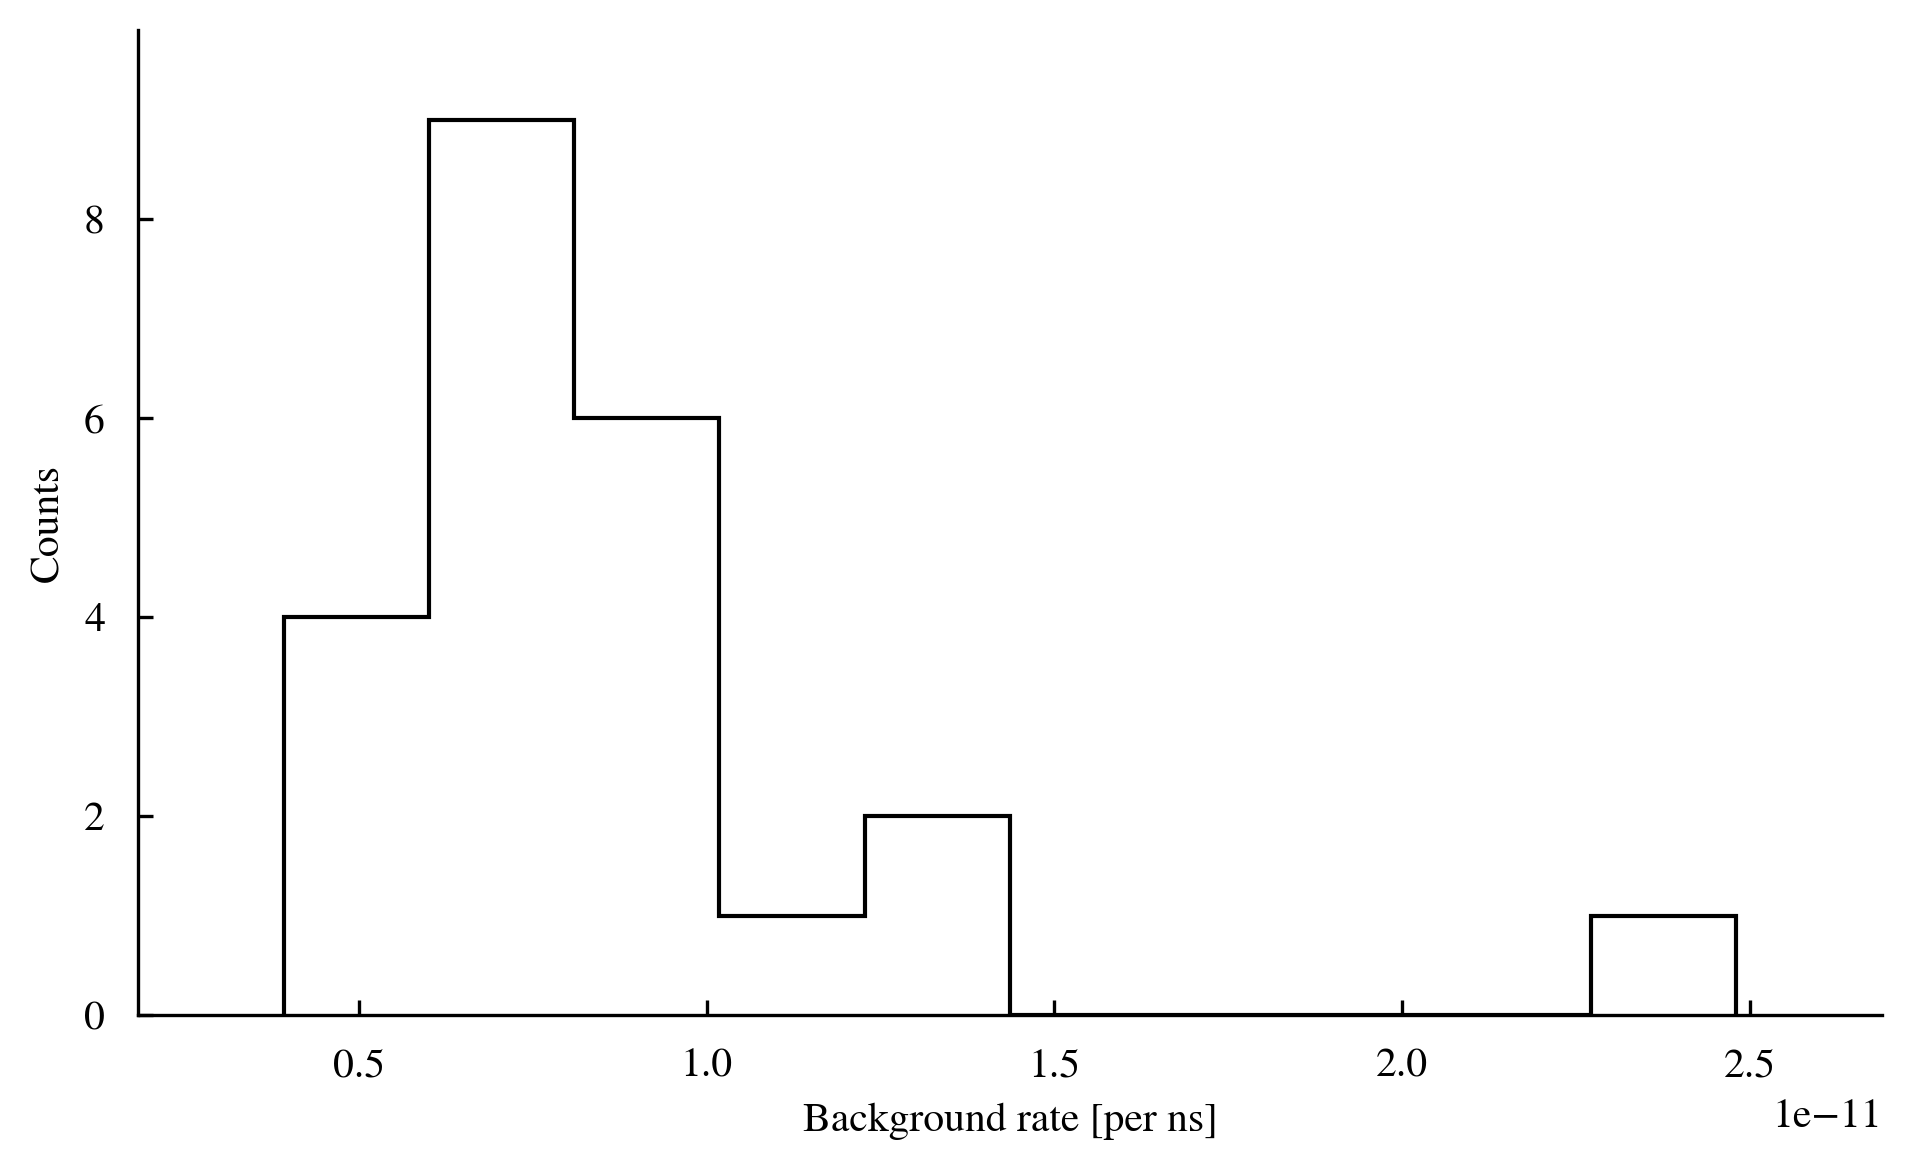

In [48]:
h = vis.hist(reflected_regions_tab["BKG_RATE"],histtype="step",bins="freedman")
plt.xlabel("Background rate [per ns]")
plt.ylabel("Counts")
plt.show()

In [49]:
estim_bkg_rate = np.median(reflected_regions_tab["BKG_RATE"])

In [52]:
expected_in_dt = dwarf["Nmax"] * estim_bkg_rate / dwarf["MPLET_DT_LAMBDA"]
from math import factorial
sum = 1
for i in range(dwarf["Nmax"]):
    sum -= np.exp(-expected_in_dt) * expected_in_dt**i / factorial(i)

print(sum)

2.868466711833758e-07


In [53]:
obs.obs_info

{'EXTNAME': 'EVENTS',
 'CREATOR': 'SASH FITS::EventListWriter',
 'TELESCOP': 'HESS',
 'ORIGIN': 'H.E.S.S. Collaboration',
 'INSTRUME': 'H.E.S.S. Phase I',
 'EV_CLASS': 'std_ImPACT',
 'OBS_ID': 64292,
 'TSTART': 328412472.0,
 'TSTOP': 328414159.0,
 'MJDREFI': 51910,
 'MJDREFF': 0.000742870370370241,
 'TIMEUNIT': 's',
 'TIMESYS': 'TT',
 'TIMEREF': 'local',
 'TASSIGN': 'Namibia',
 'TELAPSE': 0,
 'ONTIME': 1687.0,
 'LIVETIME': 1687.0,
 'DEADC': 1.0,
 'OBJECT': 'Sgr Dwarf Galaxy',
 'RA_OBJ': 283.775,
 'DEC_OBJ': -30.483333333333,
 'RA_PNT': 283.775,
 'DEC_PNT': -31.1833333214121,
 'GLON_PNT': 4.94464099254192,
 'GLAT_PNT': -14.3748193493572,
 'ALT_PNT': 79.5343909015595,
 'AZ_PNT': 223.474313751861,
 'RADECSYS': 'FK5',
 'EQUINOX': 2000,
 'CONV_DEP': 0.0,
 'CONV_RA': 283.775,
 'CONV_DEC': -30.483333333333,
 'OBS_MODE': 'WOBBLE',
 'N_TELS': 3,
 'TELLIST': '1,2,3',
 'GEOLAT': -23.2717777777778,
 'GEOLON': 16.5002222222222,
 'ALTITUDE': 1835.0,
 'MUONEFF': 0.0799483185013135,
 'MUONCORR': 0.959